In [1]:
library(tidyverse)
library(data.table)
#turning off warnings
options(warn=-1)
options(scipen = 999)
#setting plot width and height
options(repr.plot.width=15, repr.plot.height = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
na.omit.list <- function(y) { return(y[!sapply(y, function(x) all(is.na(x)))]) }

In [3]:
coverage_data = fread('../input/calvin-smith-data-clean/coverage_id.csv',
                     drop='V1')

head(coverage_data)

gameId,playId,passResult,targetNflId,time,x,y,o_std,o,dir,⋯,angleToBall360,distanceFromTarget,angleToTarget,qb_slope,wr_slope,defender_o,diff_qb,diff_wr,look_at_qb,distance_from_qb
<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2018090600,75,C,2495454,2018-09-07 01:07:15,31.11,16.83333,6.030109,104.49,36.45,⋯,172.7946,8.029352,72.08406,277.2054,72.08406,345.4998,-68.29442,86.58425,1,10.23481
2018090600,75,C,2495454,2018-09-07 01:07:15,31.11,16.82333,6.030109,104.49,37.08,⋯,172.8020,8.016764,72.13008,277.1980,72.13008,345.4998,-68.30180,86.63027,1,10.24040
2018090600,75,C,2495454,2018-09-07 01:07:15,31.11,16.82333,6.065887,102.44,34.00,⋯,172.9987,8.007609,72.33438,277.0013,72.33438,347.5497,-70.54848,84.78463,1,10.24602
2018090600,75,C,2495454,2018-09-07 01:07:15,31.11,16.83333,6.111963,99.80,278.87,⋯,170.4993,8.005105,72.62890,279.5007,72.62890,350.1897,-70.68896,82.43923,1,10.23926
2018090600,75,C,2495454,2018-09-07 01:07:16,31.12,16.82333,6.124703,99.07,288.04,⋯,168.3263,7.977092,72.79166,281.6737,72.79166,350.9196,-69.24594,81.87201,1,10.26599
2018090600,75,C,2495454,2018-09-07 01:07:16,31.13,16.81333,6.136746,98.38,317.54,⋯,166.6636,7.937512,73.23162,283.3364,73.23162,351.6096,-68.27327,81.62199,1,10.31733


In [4]:
merge_dat <- fread('../input/merge-clean-data/full_tracking_df.csv',
                  drop=c('V1', 'passResult', 'targetNflId', 'x', 'y', 'o', 'dir', 's', 'a',
                        'event', 'epa', 'position', 'route', 'isDefensivePI', 'targetedReceiver',
                        'team_name', 'ball_x', 'ball_y', 'ball_snap_x', 'max_space_available',
                        'target_x', 'target_y', 'qb_x', 'qb_y', 'qb_s', 'qb_a', 'distanceFromTarget',
                        'distance_from_qb'))

In [5]:
colnames(merge_dat)[which(colnames(merge_dat) %in% colnames(coverage_data))]

[1] "gameId"      "playId"      "frameId"     "nflId"       "displayName"

In [6]:
coverage_data <- merge(coverage_data,
                       merge_dat,
                       by=c('gameId', 'playId', 'frameId', 'nflId', 'displayName'))
colnames(coverage_data)
rm(merge_dat)

[1] "gameId"                    "playId"                   
 [3] "frameId"                   "nflId"                    
 [5] "displayName"               "passResult"               
 [7] "targetNflId"               "time"                     
 [9] "x"                         "y"                        
[11] "o_std"                     "o"                        
[13] "dir"                       "s"                        
[15] "a"                         "dis"                      
[17] "event"                     "epa"                      
[19] "position"                  "route"                    
[21] "team"                      "homeTeamAbbr"             
[23] "visitorTeamAbbr"           "possessionTeam"           
[25] "isDefensivePI"             "targetedReceiver"         
[27] "team_name"                 "ball_x"                   
[29] "ball_y"                    "ball_snap_x"              
[31] "max_space_available"       "target_x"                 
[33] "target_y"                  "target_dir"               
[35] "qb_x"                      "qb_y"                     
[37] "qb_s"                      "qb_a"                     
[39] "distanceFromBall"          "angleToBall"              
[41] "angleToBall2"              "angleToBall360"           
[43] "distanceFromTarget"        "angleToTarget"            
[45] "qb_slope"                  "wr_slope"                 
[47] "defender_o"                "diff_qb"                  
[49] "diff_wr"                   "look_at_qb"               
[51] "distance_from_qb"          "off_nflId"                
[53] "dist_from_off"             "nearest_is_target"        
[55] "distanceFromBall.x"        "off_distanceFromBall"     
[57] "ball_behind_db"            "diff_in_speed"            
[59] "diff_in_acceleration"      "diff_in_dir"              
[61] "receiver_behind_db"        "receiver_distance_from_qb"
[63] "num_of_receivers_nearest"  "dist_rate_of_change"      
[65] "his_off_most_open"         "distanceFromBall.y"

In [7]:
coverage_data <- coverage_data %>%

mutate(dist_los = x - ball_snap_x)

In [8]:
snap_to_forward <- function(player_df){
    ball_snap_index <- which(player_df$event == 'ball_snap')
    
    ball_forward_index <- which(player_df$event == 'pass_forward')
    
    if(is.numeric(ball_snap_index) == FALSE | is.numeric(ball_forward_index) == FALSE |
      length(ball_snap_index) < 1 | length(ball_forward_index) < 1){
        return(NA)
    }
    
    return(player_df[ball_snap_index:ball_forward_index,])
}

In [9]:
coverage_data <- coverage_data %>%

group_split(gameId, playId, nflId)

coverage_data <- lapply(coverage_data, snap_to_forward)
coverage_data <- na.omit.list(coverage_data)
coverage_data <- bind_rows(coverage_data)
head(coverage_data)

gameId,playId,frameId,nflId,displayName,passResult,targetNflId,time,x,y,⋯,diff_in_speed,diff_in_acceleration,diff_in_dir,receiver_behind_db,receiver_distance_from_qb,num_of_receivers_nearest,dist_rate_of_change,his_off_most_open,distanceFromBall.y,dist_los
<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
2018090600,75,11,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.83333,⋯,0.01,0.01,258.48,1.89,9.538433,2,0.000000000,0,9.726813,1.22
2018090600,75,12,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.82333,⋯,0.01,0.01,276.29,1.89,9.530519,2,0.000000000,0,9.736735,1.22
2018090600,75,13,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.82333,⋯,-0.02,-0.29,280.46,1.88,9.533651,2,0.000000000,0,9.762797,1.22
2018090600,75,14,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.83333,⋯,-0.07,-0.50,34.84,1.88,9.544658,2,-0.006038243,0,9.814622,1.22
2018090600,75,15,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:16,31.12,16.82333,⋯,-0.22,-1.20,9.95,1.86,9.563472,2,-0.017213601,0,9.884452,1.23
2018090600,75,16,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:16,31.13,16.81333,⋯,-0.40,-1.57,29.29,1.83,9.600417,2,-0.027603487,0,9.927724,1.24


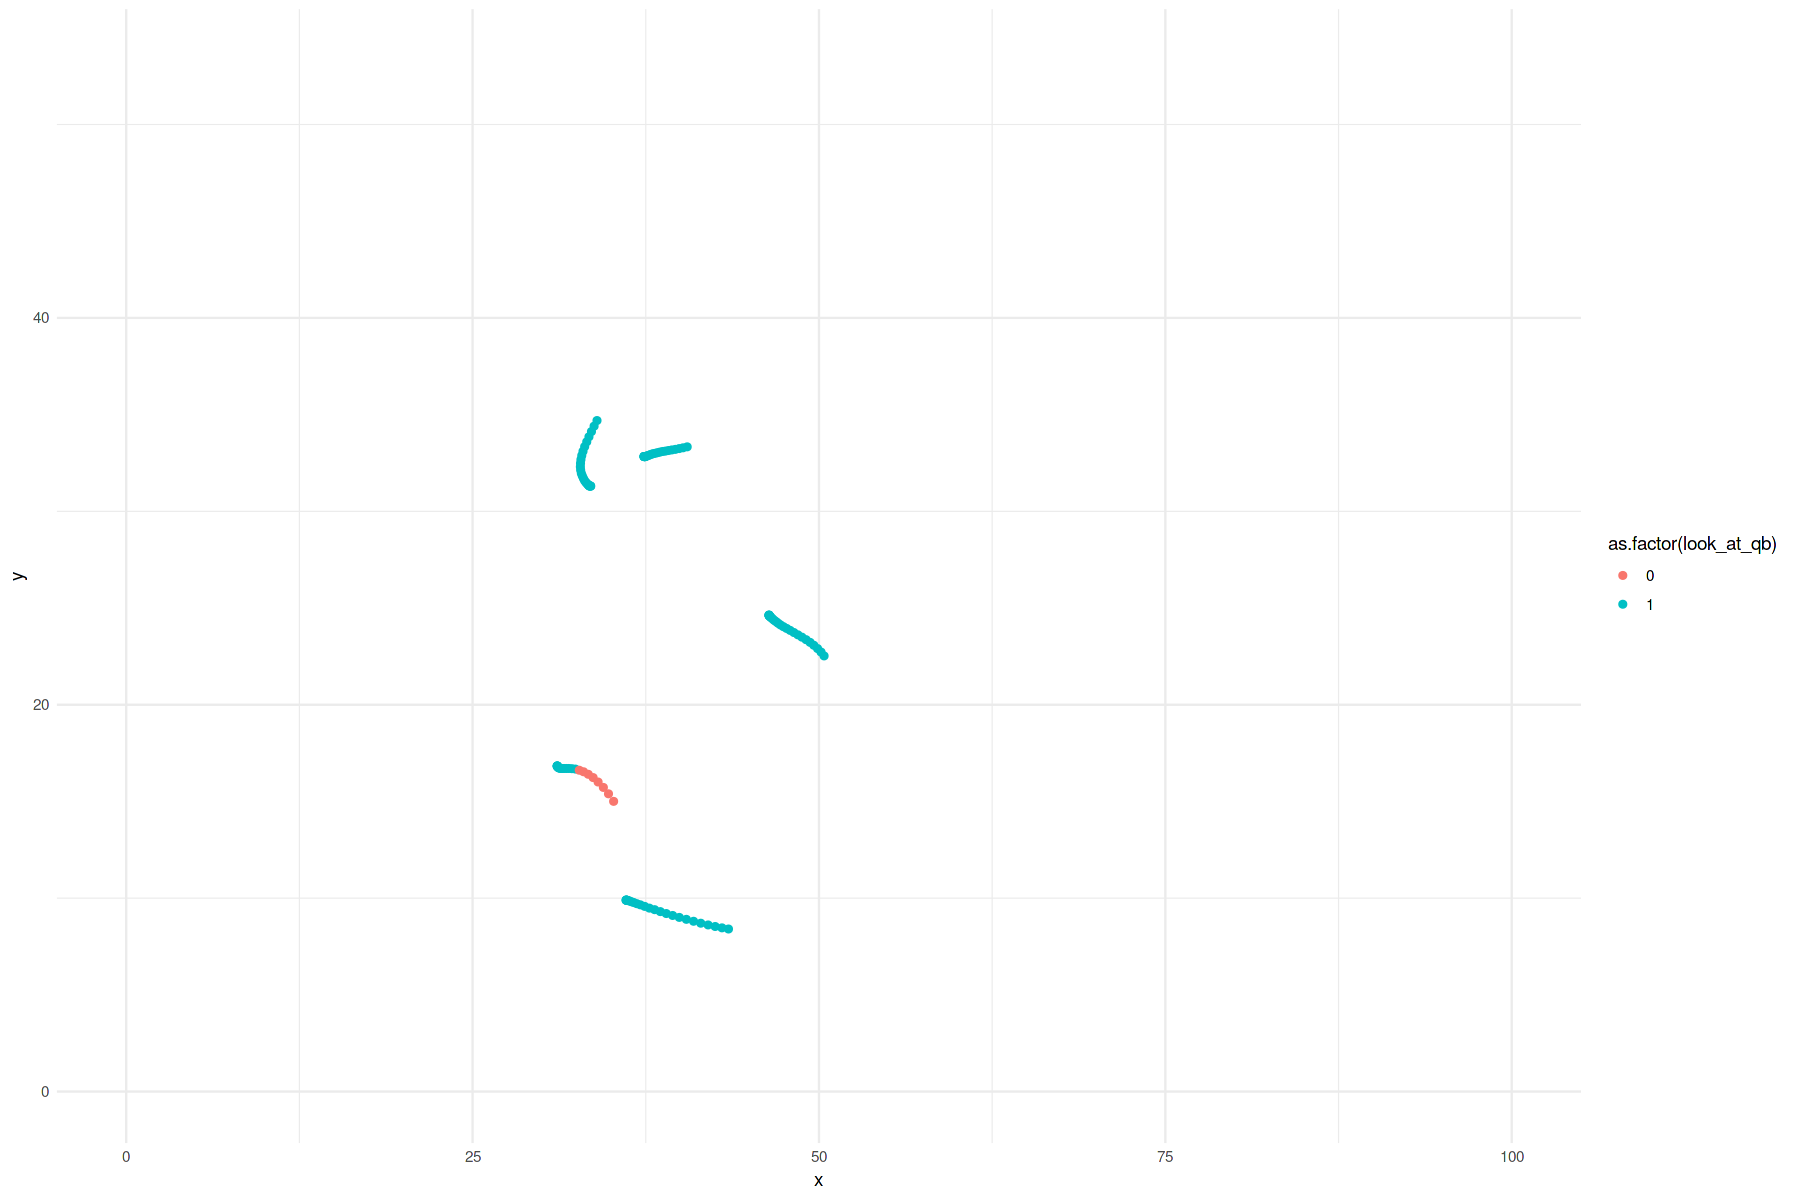

In [10]:
sample <- coverage_data %>%

filter(gameId == 2018090600 & playId == 75)

sample %>%

ggplot(aes(x=x, y=y)) +
geom_point(aes(col=as.factor(look_at_qb))) +
theme_minimal() +
coord_cartesian(ylim=c(0,53.3), xlim=c(0,100))

In [11]:
colnames(sample)
unique(sample$event)
head(sample)

[1] "gameId"                    "playId"                   
 [3] "frameId"                   "nflId"                    
 [5] "displayName"               "passResult"               
 [7] "targetNflId"               "time"                     
 [9] "x"                         "y"                        
[11] "o_std"                     "o"                        
[13] "dir"                       "s"                        
[15] "a"                         "dis"                      
[17] "event"                     "epa"                      
[19] "position"                  "route"                    
[21] "team"                      "homeTeamAbbr"             
[23] "visitorTeamAbbr"           "possessionTeam"           
[25] "isDefensivePI"             "targetedReceiver"         
[27] "team_name"                 "ball_x"                   
[29] "ball_y"                    "ball_snap_x"              
[31] "max_space_available"       "target_x"                 
[33] "target_y"                  "target_dir"               
[35] "qb_x"                      "qb_y"                     
[37] "qb_s"                      "qb_a"                     
[39] "distanceFromBall"          "angleToBall"              
[41] "angleToBall2"              "angleToBall360"           
[43] "distanceFromTarget"        "angleToTarget"            
[45] "qb_slope"                  "wr_slope"                 
[47] "defender_o"                "diff_qb"                  
[49] "diff_wr"                   "look_at_qb"               
[51] "distance_from_qb"          "off_nflId"                
[53] "dist_from_off"             "nearest_is_target"        
[55] "distanceFromBall.x"        "off_distanceFromBall"     
[57] "ball_behind_db"            "diff_in_speed"            
[59] "diff_in_acceleration"      "diff_in_dir"              
[61] "receiver_behind_db"        "receiver_distance_from_qb"
[63] "num_of_receivers_nearest"  "dist_rate_of_change"      
[65] "his_off_most_open"         "distanceFromBall.y"       
[67] "dist_los"

[1] "ball_snap"    "None"         "pass_forward"

gameId,playId,frameId,nflId,displayName,passResult,targetNflId,time,x,y,⋯,diff_in_speed,diff_in_acceleration,diff_in_dir,receiver_behind_db,receiver_distance_from_qb,num_of_receivers_nearest,dist_rate_of_change,his_off_most_open,distanceFromBall.y,dist_los
<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
2018090600,75,11,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.83333,⋯,0.01,0.01,258.48,1.89,9.538433,2,0.000000000,0,9.726813,1.22
2018090600,75,12,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.82333,⋯,0.01,0.01,276.29,1.89,9.530519,2,0.000000000,0,9.736735,1.22
2018090600,75,13,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.82333,⋯,-0.02,-0.29,280.46,1.88,9.533651,2,0.000000000,0,9.762797,1.22
2018090600,75,14,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:15,31.11,16.83333,⋯,-0.07,-0.50,34.84,1.88,9.544658,2,-0.006038243,0,9.814622,1.22
2018090600,75,15,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:16,31.12,16.82333,⋯,-0.22,-1.20,9.95,1.86,9.563472,2,-0.017213601,0,9.884452,1.23
2018090600,75,16,79848,Malcolm Jenkins,C,2495454,2018-09-07 01:07:16,31.13,16.81333,⋯,-0.40,-1.57,29.29,1.83,9.600417,2,-0.027603487,0,9.927724,1.24


In [12]:
clustering_data_func <- function(player_df){
    gameId <- player_df$gameId[1]
    playId <- player_df$playId[1]
    nflId <- player_df$nflId[1]
    
    snap_to_throw <- (max(player_df$frameId) - min(player_df$frameId)) / 10
    
    var_xs <- var(player_df$x, na.rm=TRUE)
    var_ys <- var(player_df$y, na.rm=TRUE)
    var_o <- var(player_df$o, na.rm=TRUE)
    avg_speed <- mean(player_df$s, na.rm=TRUE)
    var_speed <- var(player_df$s, na.rm=TRUE)
    look_at_qb <- mean(player_df$look_at_qb, na.rm=TRUE)
    avg_dist <- mean(player_df$dist_from_off, na.rm=TRUE)
    var_dist <- var(player_df$dist_from_off, na.rm=TRUE)
    avg_dir_diff <- mean(player_df$diff_in_dir, na.rm=TRUE)
    avg_speed_diff <- mean(player_df$diff_in_speed, na.rm=TRUE)
    avg_acc_diff <- mean(player_df$diff_in_acceleration, na.rm=TRUE)
    #max_dist <- max(player_df$dist_from_off, na.rm=TRUE)
    #min_dist <- min(player_df$dist_from_off, na.rm=TRUE)
    #dist_range <- max_dist - min_dist
    #num_closest <- length(unique(player_df$off_nflId))
    unique_offs <- unique(player_df$off_nflId)
    # first offensive player nearest to
    first_off <- unique_offs[1]
    # last offensive player nearest to
    last_off <- unique_offs[length(unique_offs)]
    # pct of time nearest to the first offensive player he was nearest to
    pct_first_off <- sum(player_df$off_nflId == first_off) / length(player_df$off_nflId)
    pct_last_off <- sum(player_df$off_nflId == last_off) / length(player_df$off_nflId)
    
    return_df <- data.frame(gameId, playId, nflId, snap_to_throw, var_xs, var_ys, var_o, avg_speed, var_speed, look_at_qb,
                           avg_dist, var_dist, avg_dir_diff, avg_speed_diff, pct_first_off, pct_last_off)
    
    return(return_df)
}

In [13]:
clustering_data <- coverage_data %>%

group_split(gameId, playId, nflId)

clustering_data <- bind_rows(lapply(clustering_data, clustering_data_func))

In [14]:
clustering_data <- na.omit(clustering_data)
head(clustering_data)
clustering_data <- clustering_data %>%

filter(snap_to_throw > 1.5)

hold_data <- clustering_data %>%

select(gameId, playId, nflId, snap_to_throw, pct_last_off)
clustering_data <- subset(clustering_data, select=-c(gameId, playId, nflId, snap_to_throw, pct_last_off))
head(clustering_data)
nrow(clustering_data)

,gameId,playId,nflId,snap_to_throw,var_xs,var_ys,var_o,avg_speed,var_speed,look_at_qb,avg_dist,var_dist,avg_dir_diff,avg_speed_diff,pct_first_off,pct_last_off
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018090600,75,79848,2.5,1.70033046,0.22510538,5583.62867,1.871154,3.419619,0.6923077,2.038183,0.7144427,59.86346,-1.4450000,1.0000000,1.00000000
2,2018090600,75,2495613,2.5,0.10720446,1.20087646,333.14461,1.601923,1.279824,1.0000000,3.121003,1.8412830,96.86885,-1.6265385,0.9615385,0.03846154
3,2018090600,75,2534832,2.5,1.84011154,0.43926462,128.65881,1.780000,1.614448,1.0000000,17.105852,2.7880629,38.29346,-1.5361538,1.0000000,1.00000000
4,2018090600,75,2552689,2.5,0.97037538,0.02726846,13.05627,1.246154,1.052137,1.0000000,7.093199,2.6571374,14.50462,-1.9615385,1.0000000,1.00000000
5,2018090600,75,2555383,2.5,6.13310046,0.27971954,1496.27083,2.948077,4.262440,1.0000000,5.678933,2.0882765,27.34846,-1.1592308,1.0000000,1.00000000
6,2018090600,146,79848,2.0,0.01500143,2.61227476,139.61959,2.519048,2.972869,0.6666667,2.538371,1.1541539,150.75381,-0.4657143,0.8095238,0.19047619


,var_xs,var_ys,var_o,avg_speed,var_speed,look_at_qb,avg_dist,var_dist,avg_dir_diff,avg_speed_diff,pct_first_off
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.70033046,0.22510538,5583.62867,1.871154,3.419619,0.6923077,2.038183,0.7144427,59.86346,-1.4450000,1.0000000
2,0.10720446,1.20087646,333.14461,1.601923,1.279824,1.0000000,3.121003,1.8412830,96.86885,-1.6265385,0.9615385
3,1.84011154,0.43926462,128.65881,1.780000,1.614448,1.0000000,17.105852,2.7880629,38.29346,-1.5361538,1.0000000
4,0.97037538,0.02726846,13.05627,1.246154,1.052137,1.0000000,7.093199,2.6571374,14.50462,-1.9615385,1.0000000
5,6.13310046,0.27971954,1496.27083,2.948077,4.262440,1.0000000,5.678933,2.0882765,27.34846,-1.1592308,1.0000000
6,0.01500143,2.61227476,139.61959,2.519048,2.972869,0.6666667,2.538371,1.1541539,150.75381,-0.4657143,0.8095238


[1] 79934

In [15]:
scaled_clustering_data <- scale(as.data.frame(clustering_data))
head(scaled_clustering_data)

,var_xs,var_ys,var_o,avg_speed,var_speed,look_at_qb,avg_dist,var_dist,avg_dir_diff,avg_speed_diff,pct_first_off
1,-0.41444673,-0.415849503,0.3664079,-0.7699036,0.3818235,0.4905949,-0.98693008,-0.4791935,0.1417953,0.009945938,0.6180178
2,-0.58079654,-0.249924647,-0.4848966,-1.0268199,-0.6381560,1.3031181,-0.77807230,-0.2890007,0.9272351,-0.152516060,0.4722681
3,-0.39985118,-0.379432826,-0.5180516,-0.8568881,-0.4786502,1.3031181,1.91936883,-0.1291993,-0.3160283,-0.071629260,0.6180178
4,-0.49066662,-0.449490654,-0.5367952,-1.3663164,-0.7466882,1.3031181,-0.01190288,-0.1512974,-0.8209468,-0.452313518,0.6180178
5,0.04841085,-0.406562646,-0.2963093,0.2577617,0.7835727,1.3031181,-0.28469083,-0.2473121,-0.5483360,0.265685905,0.6180178
6,-0.59042413,-0.009923622,-0.5162744,-0.1516441,0.1688706,0.4228846,-0.89045235,-0.4049772,2.0709441,0.886326141,-0.1037900


In [16]:
library(mclust)
gmm.model <- Mclust(scaled_clustering_data, G=2)
summary(gmm.model)

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map




---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 2
components: 

 log-likelihood     n  df      BIC      ICL
      -893567.7 79934 155 -1788885 -1792036

Clustering table:
    1     2 
31192 48742 

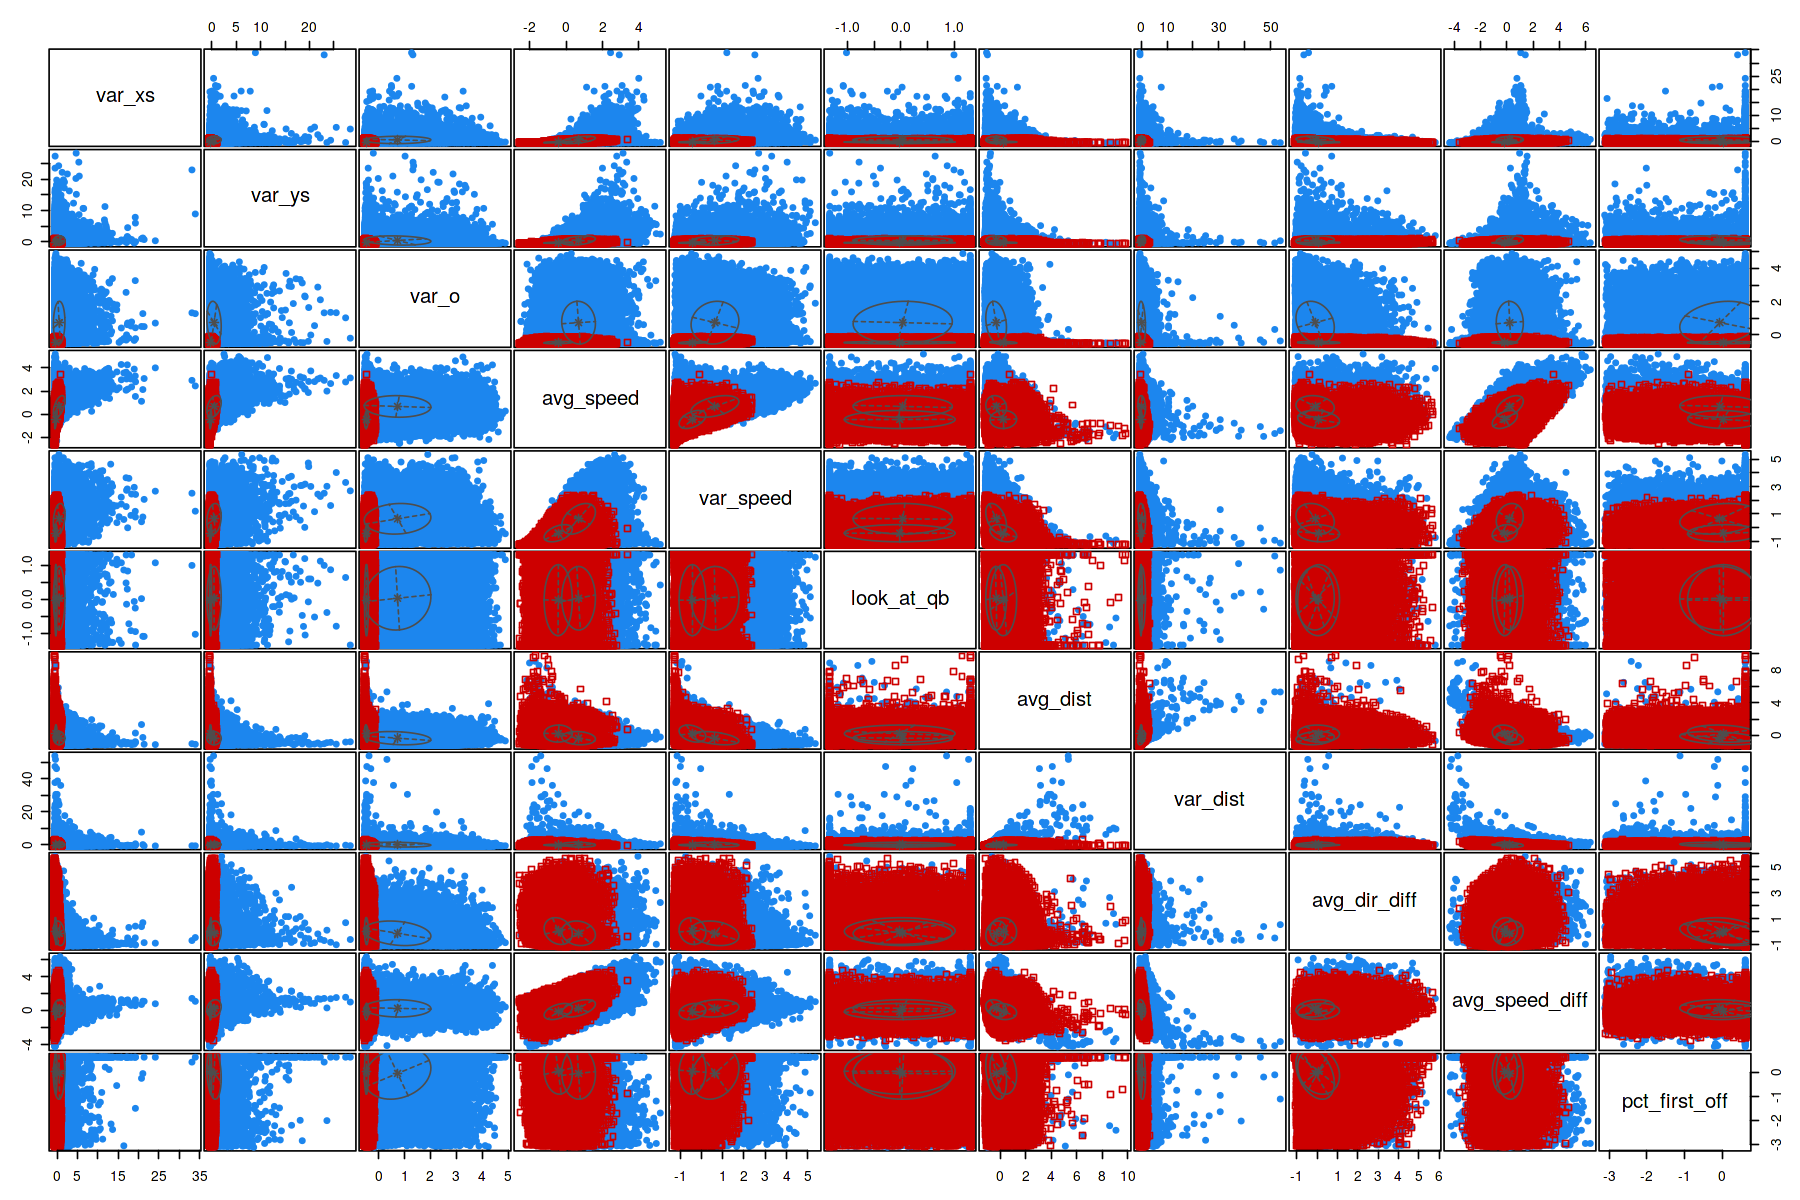

In [17]:
plot(gmm.model, what = "classification")

In [18]:
classes <- as.data.frame(round(gmm.model$z,8))
class <- gmm.model$classification
classes <- cbind.data.frame(classes, class)
head(classes)

,V1,V2,class
,<dbl>,<dbl>,<dbl>
1,1.00000000,0.0000000,1
2,0.00001103,0.9999890,2
3,0.00000012,0.9999999,2
4,0.00000660,0.9999934,2
5,0.00386970,0.9961303,2
6,0.00013014,0.9998699,2


In [19]:
scaled_clustering_data <- cbind.data.frame(scaled_clustering_data, classes)
head(scaled_clustering_data)

,var_xs,var_ys,var_o,avg_speed,var_speed,look_at_qb,avg_dist,var_dist,avg_dir_diff,avg_speed_diff,pct_first_off,V1,V2,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.41444673,-0.415849503,0.3664079,-0.7699036,0.3818235,0.4905949,-0.98693008,-0.4791935,0.1417953,0.009945938,0.6180178,1.00000000,0.0000000,1
2,-0.58079654,-0.249924647,-0.4848966,-1.0268199,-0.6381560,1.3031181,-0.77807230,-0.2890007,0.9272351,-0.152516060,0.4722681,0.00001103,0.9999890,2
3,-0.39985118,-0.379432826,-0.5180516,-0.8568881,-0.4786502,1.3031181,1.91936883,-0.1291993,-0.3160283,-0.071629260,0.6180178,0.00000012,0.9999999,2
4,-0.49066662,-0.449490654,-0.5367952,-1.3663164,-0.7466882,1.3031181,-0.01190288,-0.1512974,-0.8209468,-0.452313518,0.6180178,0.00000660,0.9999934,2
5,0.04841085,-0.406562646,-0.2963093,0.2577617,0.7835727,1.3031181,-0.28469083,-0.2473121,-0.5483360,0.265685905,0.6180178,0.00386970,0.9961303,2
6,-0.59042413,-0.009923622,-0.5162744,-0.1516441,0.1688706,0.4228846,-0.89045235,-0.4049772,2.0709441,0.886326141,-0.1037900,0.00013014,0.9998699,2


In [20]:
cluster_output <- scaled_clustering_data %>%
group_by(class) %>%
summarise(across(everything(), mean)) %>%
melt(id.vars = 'class')
head(cluster_output)

`summarise()` ungrouping output (override with `.groups` argument)



,class,variable,value
,<dbl>,<fct>,<dbl>
1,1,var_xs,0.5027796
2,2,var_xs,-0.3217492
3,1,var_ys,0.4317531
4,2,var_ys,-0.2762964
5,1,var_o,0.7372734
6,2,var_o,-0.4718114


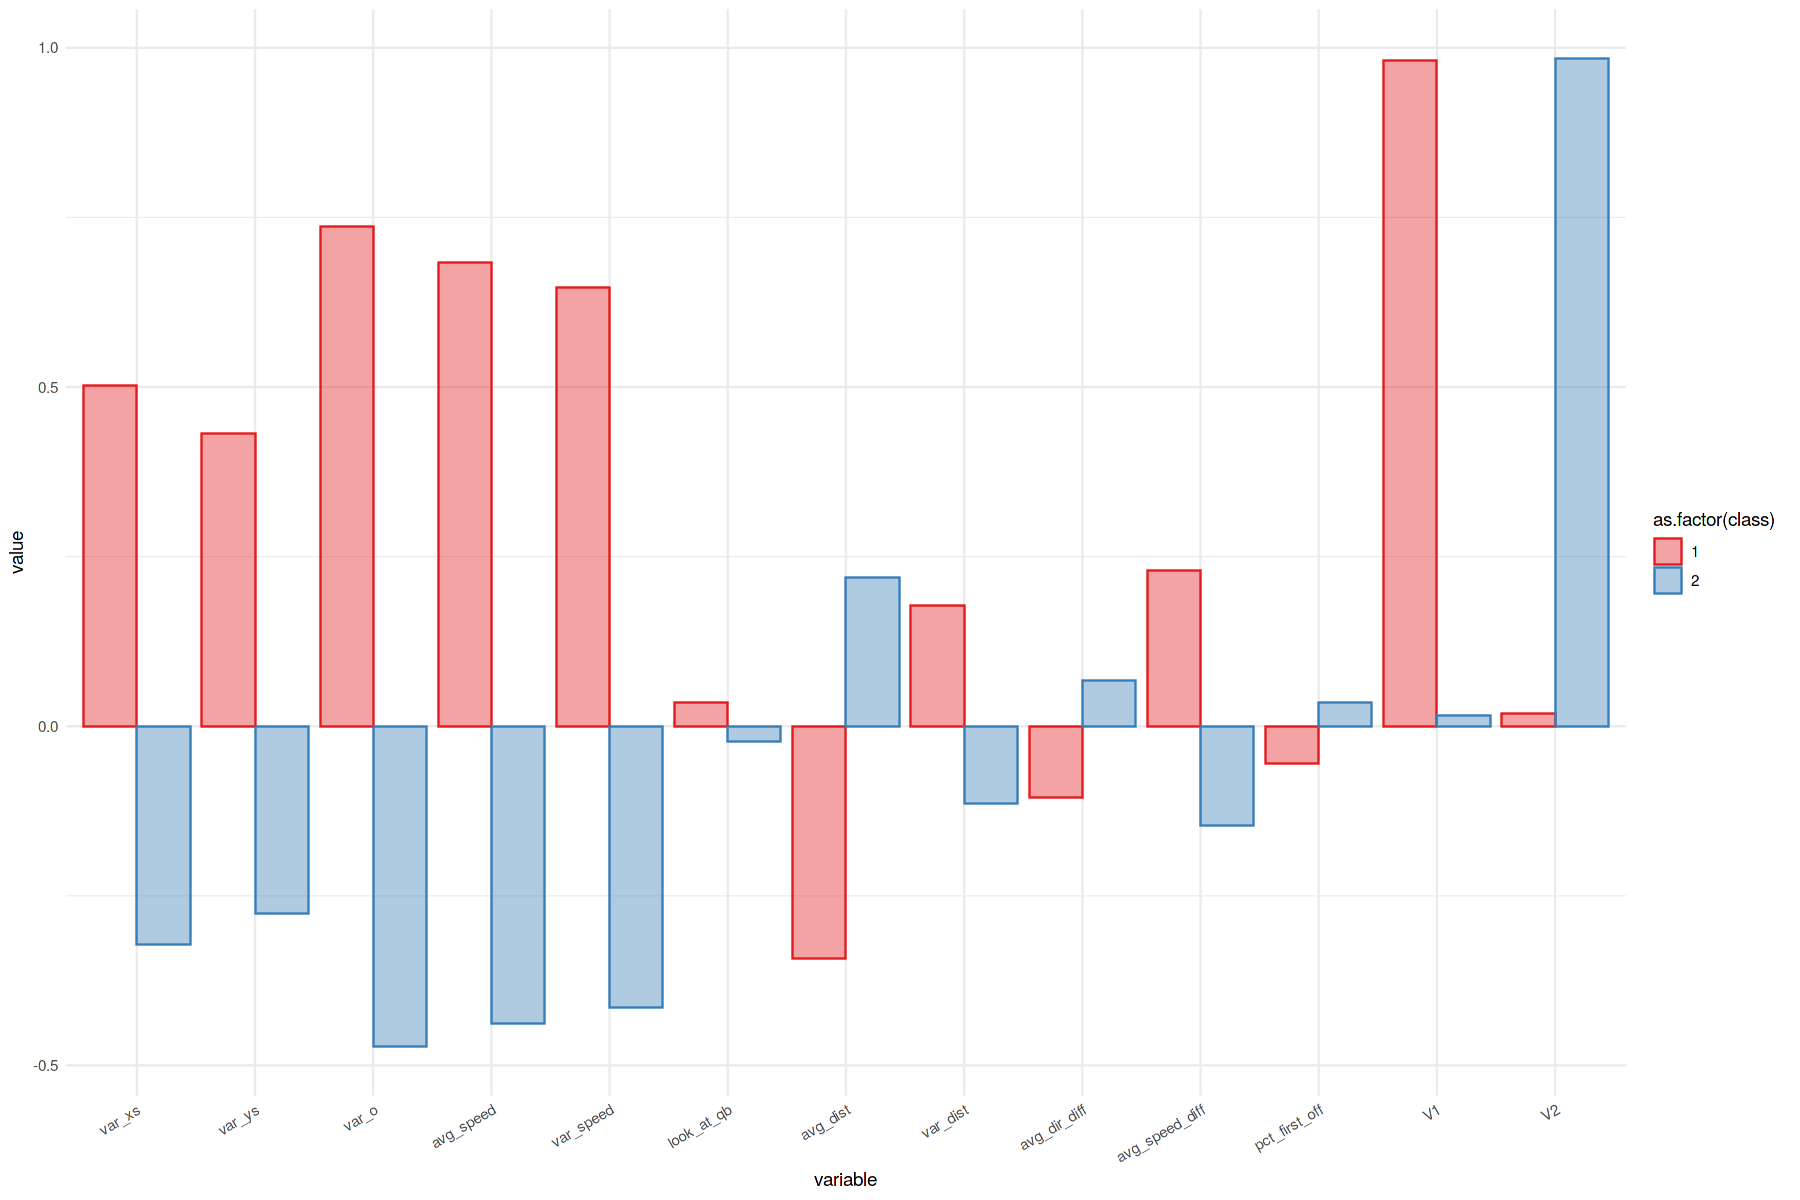

In [21]:
cluster_output %>%

ggplot(aes(x=variable, y=value, col=as.factor(class), fill=as.factor(class))) +
geom_bar(alpha=.4, stat='identity', position='dodge') +
theme_minimal() +
theme(axis.text.x = element_text(angle = 30, hjust=1)) +
scale_color_brewer(palette='Set1') +
scale_fill_brewer(palette='Set1')

In [22]:
scaled_clustering_data <- scaled_clustering_data %>%

mutate(coverage = if_else(class == 1, 'man', 'zone'),
      coverage_certainty = if_else(class == 1, V1, V2))
head(scaled_clustering_data)

,var_xs,var_ys,var_o,avg_speed,var_speed,look_at_qb,avg_dist,var_dist,avg_dir_diff,avg_speed_diff,pct_first_off,V1,V2,class,coverage,coverage_certainty
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,-0.41444673,-0.415849503,0.3664079,-0.7699036,0.3818235,0.4905949,-0.98693008,-0.4791935,0.1417953,0.009945938,0.6180178,1.00000000,0.0000000,1,man,1.0000000
2,-0.58079654,-0.249924647,-0.4848966,-1.0268199,-0.6381560,1.3031181,-0.77807230,-0.2890007,0.9272351,-0.152516060,0.4722681,0.00001103,0.9999890,2,zone,0.9999890
3,-0.39985118,-0.379432826,-0.5180516,-0.8568881,-0.4786502,1.3031181,1.91936883,-0.1291993,-0.3160283,-0.071629260,0.6180178,0.00000012,0.9999999,2,zone,0.9999999
4,-0.49066662,-0.449490654,-0.5367952,-1.3663164,-0.7466882,1.3031181,-0.01190288,-0.1512974,-0.8209468,-0.452313518,0.6180178,0.00000660,0.9999934,2,zone,0.9999934
5,0.04841085,-0.406562646,-0.2963093,0.2577617,0.7835727,1.3031181,-0.28469083,-0.2473121,-0.5483360,0.265685905,0.6180178,0.00386970,0.9961303,2,zone,0.9961303
6,-0.59042413,-0.009923622,-0.5162744,-0.1516441,0.1688706,0.4228846,-0.89045235,-0.4049772,2.0709441,0.886326141,-0.1037900,0.00013014,0.9998699,2,zone,0.9998699


In [23]:
classes <- scaled_clustering_data %>%

select(coverage, coverage_certainty)
final_df <- cbind.data.frame(hold_data, clustering_data, classes)
head(final_df)

,gameId,playId,nflId,snap_to_throw,pct_last_off,var_xs,var_ys,var_o,avg_speed,var_speed,look_at_qb,avg_dist,var_dist,avg_dir_diff,avg_speed_diff,pct_first_off,coverage,coverage_certainty
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,2018090600,75,79848,2.5,1.00000000,1.70033046,0.22510538,5583.62867,1.871154,3.419619,0.6923077,2.038183,0.7144427,59.86346,-1.4450000,1.0000000,man,1.0000000
2,2018090600,75,2495613,2.5,0.03846154,0.10720446,1.20087646,333.14461,1.601923,1.279824,1.0000000,3.121003,1.8412830,96.86885,-1.6265385,0.9615385,zone,0.9999890
3,2018090600,75,2534832,2.5,1.00000000,1.84011154,0.43926462,128.65881,1.780000,1.614448,1.0000000,17.105852,2.7880629,38.29346,-1.5361538,1.0000000,zone,0.9999999
4,2018090600,75,2552689,2.5,1.00000000,0.97037538,0.02726846,13.05627,1.246154,1.052137,1.0000000,7.093199,2.6571374,14.50462,-1.9615385,1.0000000,zone,0.9999934
5,2018090600,75,2555383,2.5,1.00000000,6.13310046,0.27971954,1496.27083,2.948077,4.262440,1.0000000,5.678933,2.0882765,27.34846,-1.1592308,1.0000000,zone,0.9961303
6,2018090600,146,79848,2.0,0.19047619,0.01500143,2.61227476,139.61959,2.519048,2.972869,0.6666667,2.538371,1.1541539,150.75381,-0.4657143,0.8095238,zone,0.9998699


In [24]:
write.csv(final_df, 'cluster_data.csv')

In [25]:
final_df %>%
group_by(coverage) %>%
summarise(avg_dur_last_off = mean(pct_last_off))

`summarise()` ungrouping output (override with `.groups` argument)



coverage,avg_dur_last_off
<chr>,<dbl>
man,0.7947832
zone,0.7791820


In [26]:
lm_last_off <- lm(pct_last_off ~ coverage, data = final_df)
summary(lm_last_off)


Call:
lm(formula = pct_last_off ~ coverage, data = final_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7933 -0.2527  0.2052  0.2208  0.2208 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   0.794783   0.001823 436.071 < 0.0000000000000002 ***
coveragezone -0.015601   0.002334  -6.684      0.0000000000234 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3219 on 79932 degrees of freedom
Multiple R-squared:  0.0005587,	Adjusted R-squared:  0.0005462 
F-statistic: 44.68 on 1 and 79932 DF,  p-value: 0.00000000002336
